<a href="https://colab.research.google.com/github/aadityasikder/NLP_1/blob/main/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
messages= [line.rstrip() for line in open('/content/SMSSpamCollection')]

In [ ]:
len(messages)

5574

In [ ]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [ ]:
messages[0]  #\t means it is Tab-separated values file. SO we ca fiz it by using pandas

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
import pandas as pd

In [ ]:
messages=pd.read_csv('/content/SMSSpamCollection', sep='\t', names=['label','message'])

In [ ]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
messages['length']=messages['message'].apply(len)

In [ ]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

<Axes: ylabel='Frequency'>

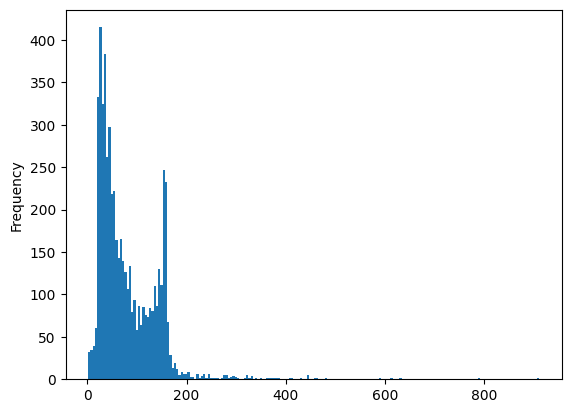

In [ ]:
messages['length'].plot.hist(bins=200)

In [ ]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [ ]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

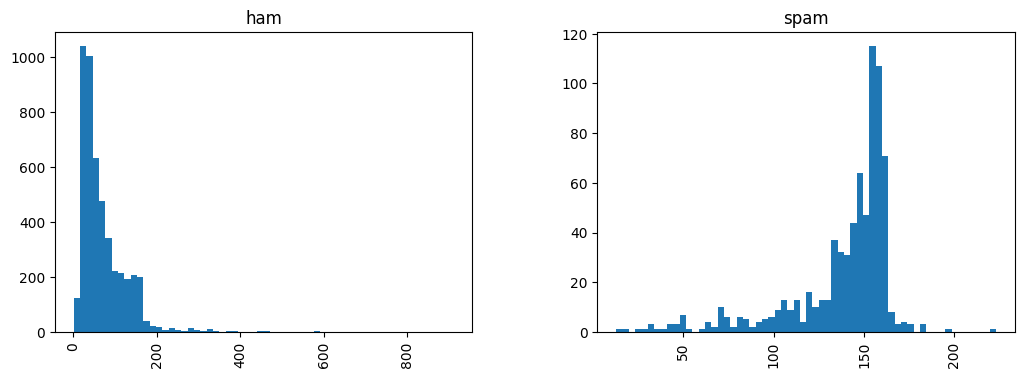

In [ ]:
messages.hist(column='length', by='label', bins=60,figsize=(12,4))

Here we can see from the histogram that spam messages normally have greater length

In this section we will convert these raw messages/characters into sequence of vectors/numbers

In [ ]:
import string

In [ ]:
mess= 'This message is sample! Trying to remove pucttuation from it.'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nopunc=[c for c in mess if c not in string.punctuation]

In [ ]:
nopunc=''.join(nopunc)

In [ ]:
nopunc

'This message is sample Trying to remove pucttuation from it'

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
nopunc.split()

['This',
 'message',
 'is',
 'sample',
 'Trying',
 'to',
 'remove',
 'pucttuation',
 'from',
 'it']

In [ ]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
clean_mess

['message', 'sample', 'Trying', 'remove', 'pucttuation']

In [ ]:
#now we put all of these above processing steps in a function that will remove the punctuation and stopwords

def text_preprocess(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


now , we tokenize these messages.
tokenization-converting a normal text string into a list of tokens

In [ ]:
messages['message'].head(5).apply(text_preprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

convert each message in to vector so that scikit learn's algorthm can work on it

we will do that in three steps using bag-of-words model:
**Term Frequency**: Count the occurrences of each word in the text.
**Inverse Document Frequency**: Weigh the counts so that frequent words have lower weights.
**Vector Normalization**: Normalize the vectors to unit length (L2 norm) to abstract from the original text length.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer =CountVectorizer(analyzer=text_preprocess).fit(messages['message'])

In [ ]:
print(len(bow_transformer.vocabulary_))  # no of words in vocab

11425


In [ ]:
mess4= messages['message'][3] #lets take one message and get its bag of word count

In [ ]:
mess4

'U dun say so early hor... U c already then say...'

In [ ]:
bow4 = bow_transformer.transform([mess4])


In [ ]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [ ]:
print(bow4.shape)

(1, 11425)


In [ ]:
bow_transformer.get_feature_names_out()[4068]


'U'

Now , we use .transform on our bag-of-words transform object and transform the entire dataframe of messages

In [ ]:
messages_bow = bow_transformer.transform(messages['message'])

In [ ]:
print('shape of sparse matrix',messages_bow.shape)

shape of sparse matrix (5572, 11425)


In [ ]:
messages_bow.nnz  #non zero occurances

50548

In [ ]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


Here's a concise version:

**What is TF-IDF?**

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure that evaluates the importance of a word in a document within a collection of documents (corpus). It's used in information retrieval and text mining.

**TF (Term Frequency)**: Measures how frequently a term appears in a document, normalized by the document's length.

**IDF (Inverse Document Frequency)**: Measures the importance of a term by weighing down frequent terms and scaling up rare ones.

**TF-IDF Weight**: The product of TF and IDF, used to score and rank documents by relevance to a user query.

Example: For a document with 100 words, where "cat" appears 3 times, TF = 0.03. If "cat" appears in 1,000 out of 10 million documents, IDF = 4. The TF-IDF weight is 0.03 * 4 = 0.12.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer


In [ ]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)


In [ ]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

8.527076498901426


In [ ]:
messages_tfidf = tfidf_transformer.transform(messages_bow)


we can now train our spam/ham classifier. we are using Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [ ]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [ ]:
messages['label'][3]

'ham'

Evaluate

In [ ]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x783987e1a950>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x783987e1a950>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1004
        spam       0.70      1.00      0.83       111

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

